In [1]:
from transformers import Wav2Vec2FeatureExtractor, UniSpeechSatForXVector
from datasets import load_dataset
import torch
import soundfile as sf
import IPython
import matplotlib.pyplot as plt
import numpy as np

In [7]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained('microsoft/wavlm-base-plus-sv')


Downloading:   0%|          | 0.00/215 [00:00<?, ?B/s]

In [8]:
model = UniSpeechSatForXVector.from_pretrained('microsoft/wavlm-base-plus-sv')

Downloading:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

You are using a model of type wavlm to instantiate a model of type unispeech-sat. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/386M [00:00<?, ?B/s]

ValueError: The state dictionary of the model you are training to load is corrupted. Are you sure it was properly saved?

In [ ]:
# audio files are decoded on the fly
dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
inputs = feature_extractor(dataset[:2]["audio"]["array"], return_tensors="pt")

embeddings = model(**inputs).embeddings
embeddings = torch.nn.functional.normalize(embeddings, dim=-1).cpu()

# the resulting embeddings can be used for cosine similarity-based retrieval
cosine_sim = torch.nn.CosineSimilarity(dim=-1)
similarity = cosine_sim(embeddings[0], embeddings[1])
threshold = 0.86  # the optimal threshold is dataset-dependent
if similarity < threshold:
    print("Speakers are not the same!")

In [3]:
orignial = sf.read('/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav')
# enhanced = sf.read('enhanced.wav')

IPython.display.Audio(orignial[0], rate=12800)

In [4]:
orignial = sf.read('/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav')
# enhanced = sf.read('enhanced.wav')

IPython.display.Audio(orignial[0], rate=16000)

In [5]:
orignial = sf.read('/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav')
# enhanced = sf.read('enhanced.wav')

IPython.display.Audio(orignial[0], rate=20000)

In [15]:
inputs = feature_extractor(orignial[0], sampling_rate=16000, return_tensors="pt")


In [23]:
print(inputs['input_values'].shape)
print(list(inputs.keys()))
print(inputs['attention_mask'].shape)

torch.Size([1, 334739])
['input_values', 'attention_mask']
torch.Size([1, 334739])


In [28]:
IPython.display.Audio(inputs['input_values'][0], rate=16000)

In [27]:
Wav2Vec2FeatureExtractor

transformers.models.wav2vec2.feature_extraction_wav2vec2.Wav2Vec2FeatureExtractor

 ...]

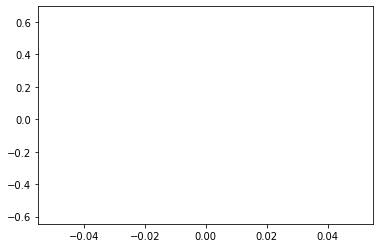

In [37]:
time = np.arange(0, len(inputs['input_values'])) * (1.0 /16000)

_ = plt.plot(inputs['input_values'][:16000])